# PivotPy

> A Python Processing Tool for Vasp Input/Output. A CLI is available in Powershell, see [Vasp2Visual](https://github.com/massgh/Vasp2Visual).


[![Run in Azure](https://notebooks.azure.com/launch.png)](https://testazurenotebooks-massaz.notebooks.azure.com/j/notebooks/test.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/massgh/pivotpy/blob/master/test.ipynb)

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  


## Install
`pip install pivotpy`

## How to use
- [Read Function References](https://github.com/massgh/pivotpy/tree/master/functions.md)
- See [Full Documentation](https://massgh.github.io/pivotpy/).
- For CLI, use [Vasp2Visual](https://github.com/massgh/Vasp2Visual).

## Changelog for version 0.9.5 onward
- `pivotpy.s_plots.quick_rgb_lines` and `pivotpy.s_plots.quick_rgb_lines` are refactored and no more depnd on `create_rgb_lines`, so this function is dropped, If you still want to use it, use versions below 0.9.5. 
- A class `pivotpy.g_utils.Vasprun` is added which provides shortcut for `export_vasprun` and plotting functions. Under this class or as aliases:
    - `quick_bplot`       --> `sbands`
    - `quick_rgb_lines`   --> `srgb`
    - `plotly_rgb_lines`  --> `irgb`
    - `quick_color_lines` --> `scolor`
    - `quick_dos_lines`   --> `sdos`
    - `plotly_dos_lines`  --> `idos`
- A class `pivotpy.g_utils.LOCPOT_CHG` is added which can be used to parse and visualize files like LOCPOT and CHG. 
- A function `pivotpy.vr_parser.split_vasprun` is added which splits `vasprun.xml` file into a small file `_vasprun.xml` without projected data and creates text files `_set[1,2,3,4].txt` based on how many spin sets are there. 
- A function `pivotpy.vr_parser.islice2array` is added which can reads data from text/csv/tsv files (even if text and numbers are mixed) accoridng to slices you provide, this does not load full file in memory and it is also useful in parsing EIGENVAL, PROCAR like files with a few lines of code only. 
- Version 1.0.0 is updated with an overhaul of widgets module. `VasprunApp` is introduced as class to access internals of app easily. 

## New: Plot in Terminal without GUI
Use `pp.plt2text(colorful=True/False)` after matplotlib's code and your figure will appear in terminal. You need to zoom out alot to get a good view like below.

Tip: Use file [matplotlib2terminal.py](https://gist.github.com/massgh/d5cc44ad32510d3ff58cfefd75c6884e) on github independent of this package to plot in terminal. 
![IMG](terminal.jpg)

# New: Ipywidgets-based GUI
See GIF here:
![GIF](widget.gif) 

- The code at end is used below to rebuild dataframe which can be use in many ways such as generating latex table. The matplotlib code is used to generate publication quality figure.

In [ ]:
from IPython.display import Markdown
import pivotpy as pp
paths = ['e:/Research/graphene_example/ISPIN_1/bands/DOS/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_1/bands/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_1/dos/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/dos/sigm0_01/vasprun.xml',
         'e:/Research/graphene_example/ISPIN_2/dos/vasprun.xml',
         'e:/Research/graphene_example/vasprun.xml']
df = pp.generate_summary(paths_list=paths)
print(df.caption)
Markdown(df.data.to_markdown())

Root Path: e:/Research/graphene_example/


|    | sys   |       V |       a |       b |       c |      VBM |      CBM |   so_max |   so_min |    E_gap | rel_path             |
|---:|:------|--------:|--------:|--------:|--------:|---------:|---------:|---------:|---------:|---------:|:---------------------|
|  0 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 |  -2.6818 |  -2.6818 |      nan |      nan |   0      | ISPIN_1/bands/DOS    |
|  1 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 |  -2.7733 |  -2.7733 |      nan |      nan |   0      | ISPIN_1/bands        |
|  2 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 | -12.7211 |  -5.2581 |      nan |      nan |   7.463  | ISPIN_1/dos          |
|  3 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 |  -3.5339 |  -1.9647 |      nan |      nan |   1.5692 | ISPIN_2/bands        |
|  4 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 | nan      | nan      |      nan |      nan | nan      | ISPIN_2/dos/sigm0_01 |
|  5 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 |  -3.0398 |  -2.6296 |      nan |      nan |   0.4102 | ISPIN_2/dos          |
|  6 | C2    | 105.493 | 2.46803 | 2.46803 | 19.9983 |  -1.2155 |  -1.9644 |      nan |      nan |  -0.7489 | nan                  |

In [ ]:
print(df.data[:2].to_latex())

\begin{tabular}{llrrrrrrrrrl}
\toprule
{} & sys &          V &        a &        b &         c &     VBM &     CBM &  so\_max &  so\_min &  E\_gap &           rel\_path \\
\midrule
0 &  C2 &  105.49325 &  2.46803 &  2.46803 &  19.99829 & -2.6818 & -2.6818 &     NaN &     NaN &    0.0 &  ISPIN\_1/bands/DOS \\
1 &  C2 &  105.49325 &  2.46803 &  2.46803 &  19.99829 & -2.7733 & -2.7733 &     NaN &     NaN &    0.0 &      ISPIN\_1/bands \\
\bottomrule
\end{tabular}



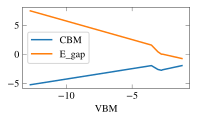

In [ ]:
ax = pp.init_figure(figsize=(3,1.5))
_ = df.data.sort_values('VBM').plot(ax=ax,x = 'VBM',y=['CBM','E_gap'])

In [ ]:
import os 
os.chdir('E:/Research/graphene_example/ISPIN_1/bands')
xml_data=pp.read_asxml()
vr=pp.export_vasprun(elim=[-5,5])
vr

Loading from PowerShell Exported Data...


Data(
    sys_info = Data(
        SYSTEM = C2
        NION = 2
        NELECT = 8
        TypeION = 1
        ElemName = ['C']
        E_Fermi = -3.3501
        fields = ['s', 'py', 'pz', 'px', 'dxy', 'dyz', 'dz2', 'dxz', 'x2-y2']
        incar = Data(
            SYSTEM = C2
            PREC = high
            ALGO = N
            LSORBIT = T
            NELMIN = 7
            ISMEAR = 0
            SIGMA = 0.10000000
            LORBIT = 11
            GGA = PS
        )
        ElemIndex = [0, 2]
        ISPIN = 1
    )
    dim_info = Data(
        kpoints = (NKPTS,3)
        kpath = (NKPTS,1)
        bands = ⇅(NKPTS,NBANDS)
        dos = ⇅(grid_size,3)
        pro_dos = ⇅(NION,grid_size,en+pro_fields)
        pro_bands = ⇅(NION,NKPTS,NBANDS,pro_fields)
    )
    kpoints = <ndarray:shape=(90, 3)>
    kpath = <list:len=90>
    bands = Data(
        E_Fermi = -3.3501
        ISPIN = 1
        NBANDS = 21
        evals = <ndarray:shape=(90, 21)>
        indices = range(1, 22)
    )
  

## Matplotlib's static plots
- Add anything from legend,colorbar, colorwheel. In below figure, all three are shown.
- Use aliases such as sbands, sdos,srgb,irgb,scolor,idos for plotting. 

Loading from PowerShell Exported Data...
 elements[0] = 0 is converted to range(0, 2) which picks all ions of 'C'.To just pick one ion at this index, wrap it in brackets [].
e:\Research\pivotpy\pivotpy\s_plots.py:428: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  cax.pcolormesh(t,r,tg.T,norm=norm,cmap=colormap,edgecolor='face')


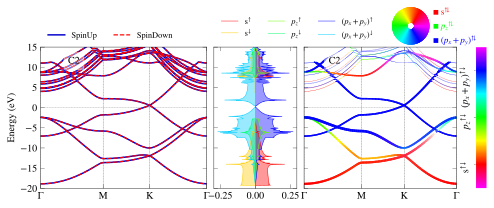

In [ ]:
#collapse_input
import pivotpy as pp, numpy as np 
import matplotlib.pyplot as plt 
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml')
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/dos/vasprun.xml')
axs=pp.init_figure(ncols=3,widths=[2,1,2.2],sharey=True,wspace=0.05,figsize=(8,2.6))
elements=[0,[0],[0,1]]
orbs=[[0],[1],[2,3]]
labels=['s','$p_z$','$(p_x+p_y)$']
ti_cks=dict(ktick_inds=[0,30,60,-1],ktick_vals=['Γ','M','K','Γ'])
args_dict=dict(elements=elements,orbs=orbs,labels=labels,elim=[-20,15])
pp.quick_bplot(path_evr=vr1,ax=axs[0],**ti_cks,elim=[-20,15])
pp.quick_rgb_lines(path_evr=vr1,ax=axs[2],**args_dict,**ti_cks,colorbar=True,)
pp.quick_dos_lines(path_evr=vr2,ax=axs[1],vertical=True,spin='both',include_dos='pdos',**args_dict,legend_kwargs={'ncol': 3},colormap='RGB_m')
pp.color_wheel(axs[2],xy=(0.7,1.15),scale=0.2,labels=[l+'$^{⇅}$' for l in labels])
pp._show() 

## Interactive plots using plotly

In [ ]:
args_dict['labels'] = ['s','p_z','p_x+p_y']
fig1 = pp.plotly_rgb_lines(vr1,**args_dict)
#pp.plotly2html(fig1) #Do inside Google Colab, fig1 inside Jupyter
from IPython.display import Markdown
Markdown("[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)")

[See Interactive Plot](https://massgh.github.io/InteractiveHTMLs/iGraphene.html)

## Brillouin Zone (BZ) Processing
- Look in `pivotpy.sio` module for details on generating mesh and path of KPOINTS as well as using Materials Projects' API to get POSCAR right in the working folder with command `get_poscar`. Below is a screenshot of interactive BZ plot. You can `double click` on blue points and hit `Ctrl + C` to copy the high symmetry points relative to reciprocal lattice basis vectors. (You will be able to draw kpath in `Pivotpy-Dash` application and generate KPOINTS automatically from a web interface later on!). 
- Same color points lie on a sphere, with radius decreasing as red to blue and  gamma point in gold color. These color help distinguishing points but the points not always be equivalent, for example in FCC, there are two points on mid of edges connecting square-hexagon and hexagon-hexagon at equal distance from center but not the same points. 
- Any colored point's hover text is in gold background.      
#### Look the output of `pivotpy.sio.splot_bz`.
![BZ](docs/images/3bz.jpg)

[See Interactive BZ Plot](https://massgh.github.io/InteractiveHTMLs/BZ.html)

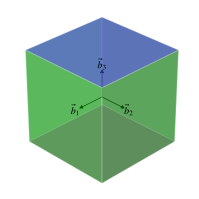

In [ ]:
import pivotpy as pp 
pp.splot_bz([[1,0,0],[0,1,0],[0,0,1]],color=(1,1,1,0.2),light_from=(0.5,0,2),colormap='RGB').set_axis_off()
#pp.plotly2html(fig2) #Do inside Google Colab, fig1 inside Jupyter
from IPython.display import Markdown
Markdown("[See Interactive BZ Plot](https://massgh.github.io/InteractiveHTMLs/BZ.html)")

## Plotting Two Calculations Side by Side 
- Here we will use `shift_kpath` to demonstrate plot of two calculations on same axes side by side

Loading from PowerShell Exported Data...


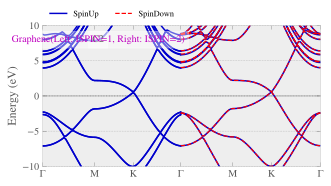

In [ ]:
#nbdev_collapse_input
import matplotlib.pyplot as plt
import pivotpy as pp 
plt.style.use('bmh')
vr1=pp.export_vasprun('E:/Research/graphene_example/ISPIN_1/bands/vasprun.xml')
shift_kpath=vr1.kpath[-1] # Add last point from first export in second one.
vr2=pp.export_vasprun('E:/Research/graphene_example/ISPIN_2/bands/vasprun.xml',shift_kpath=shift_kpath,try_pwsh=False)
last_k=vr2.kpath[-1]
axs=pp.init_figure(figsize=(5,2.6))
K_all=[*vr1.kpath,*vr2.kpath] # Merge kpath for ticks
kticks=[K_all[i] for i in [0,30,60,90,120,150,-1]]
ti_cks=dict(xticks=kticks,xt_labels=['Γ','M','K','Γ','M','K','Γ'])
pp.quick_bplot(path_evr=vr1,ax=axs)
pp.quick_bplot(path_evr=vr2,ax=axs,txt='Graphene(Left: ISPIN=1, Right: ISPIN=2)',ctxt='m')
pp.modify_axes(ax=axs,xlim=[0,last_k],ylim=[-10,10],**ti_cks)

## Interpolation 
Amost every bandstructure and DOS plot function has an argument `interp_nk` which is a dictionary with keys `n` (Number of additional points between adjacent points) and `k` (order of interpolation 0-3). `n > k` must hold.

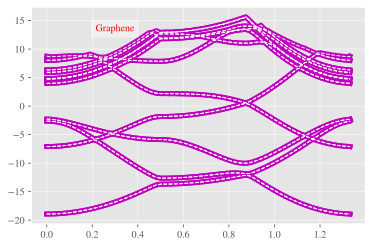

In [ ]:
#collapse_input
import pivotpy as pp
plt.style.use('ggplot')
k=vr1.kpath
ef=vr1.bands.E_Fermi
evals=vr1.bands.evals-ef
#Let's interpolate our graph to see effect. It is useful for colored graphs.
knew,enew=pp.interpolate_data(x=k,y=evals,n=10,k=3)
plot=plt.plot(k,evals,'m',lw=5,label='real data')
plot=plt.plot(k,evals,'w',lw=1,label='interpolated',ls='dashed')
pp.add_text(ax=plt.gca(),txts='Graphene')

## LOCPOT,CHG Visualization
check out the class `pivotpy.LOCPOT_CHG` to visulize local potential/charge and magnetization in a given direction.

## Running powershell commands from python.
Some tasks are very tideious in python while just a click way in powershell. See below, and try to list processes in python yourself to see the difference!

In [ ]:
pp.ps2std(ps_command='(Get-Process)[0..4]')

NPM(K)    PM(M)      WS(M)     CPU(s)      Id  SI ProcessName
------    -----      -----     ------      --  -- -----------
51    38.57      17.12     494.38   15032   1 AltC
34    25.75      52.16      16.78   12744   1 ApplicationFrameHost
8     1.56       6.43       0.00   14652   0 AppVShNotify
9     1.84       7.13       0.08   16136   1 AppVShNotify
19     4.46       4.61       0.00    5244   0 armsvc


## Advancaed: Poweshell Cell/Line Magic `%%ps/%ps`
- You can create a IPython cell magic to run powershell commands directly in IPython Shell/Notebook (Powershell core installation required).
- Cell magic can be assigned to a variable `foo` by `%%ps --out foo`
- Line magic can be assigned to a variable by `foo = %ps powershell_command`

Put below code in ipython profile's startup file (create one) "~/.ipython/profile_default/startup/powershell_magic.py"
```python
from IPython.core.magic import register_line_cell_magic
from IPython import get_ipython
@register_line_cell_magic
def ps(line, cell=None):
    if cell:
        return get_ipython().run_cell_magic('powershell',line,cell)
    else:
        get_ipython().run_cell_magic('powershell','--out posh_output',line)
        return posh_output.splitlines()
``` 
Additionally you need to add following lines in "~/.ipython/profile_default/ipython_config.py" file to make above magic work.
```python
from traitlets.config.application import get_config
c = get_config()
c.ScriptMagics.script_magics = ['powershell']
c.ScriptMagics.script_paths = {
    'powershell' : 'powershell.exe -noprofile -command -',
    'pwsh': 'pwsh.exe -noprofile -command -'
}
```

In [ ]:
%%ps 
Get-ChildItem 'E:\Research\graphene_example\'



    Directory: E:\Research\graphene_example


Mode                 LastWriteTime         Length Name                                                                 
----                 -------------         ------ ----                                                                 
da----        10/31/2020   1:30 PM                ISPIN_1                                                              
da----          5/9/2020   1:05 PM                ISPIN_2                                                              
-a----          5/9/2020   1:01 PM          75331 OUTCAR                                                               
-a----         3/13/2021   4:14 PM            193 result.json                                                          
-a----        11/22/2020   6:08 PM            693 sys_info.pickle                                                      
-a----        11/22/2020   6:08 PM          91850 vasprun.pickle                                                

In [ ]:
x = %ps (Get-ChildItem 'E:\Research\graphene_example\').Name
x

['ISPIN_1',
 'ISPIN_2',
 'OUTCAR',
 'result.json',
 'sys_info.pickle',
 'vasprun.pickle',
 'vasprun.xml']

In [ ]:
#hide
#from nbdev.export import *
#notebook2script()

[Functions Reference](functions.md)

In [ ]:
#hide_input
import pivotpy as pp 
pp.nav_links(0)

<style>a{text-decoration: none !important;color:lightkblue;font-weight:bold;}
                a:focus,a:active,a:hover{color:hotpink !important;}</style>
> [&nbsp;`▶` Index●&nbsp;](https://massgh.github.io/pivotpy/)  
> [&nbsp;`▶` XmlElementTree&nbsp;](https://massgh.github.io/pivotpy/XmlElementTree)  
> [&nbsp;`▶` StaticPlots&nbsp;](https://massgh.github.io/pivotpy/StaticPlots)  
> [&nbsp;`▶` InteractivePlots&nbsp;](https://massgh.github.io/pivotpy/InteractivePlots)  
> [&nbsp;`▶` Utilities&nbsp;](https://massgh.github.io/pivotpy/Utilities)  
> [&nbsp;`▶` StructureIO&nbsp;](https://massgh.github.io/pivotpy/StructureIO)  
> [&nbsp;`▶` Widgets&nbsp;](https://massgh.github.io/pivotpy/Widgets)  
